 # <font size= 1> <font color='FFFFFF'> Modelos de mezcla de funciones gaussianas

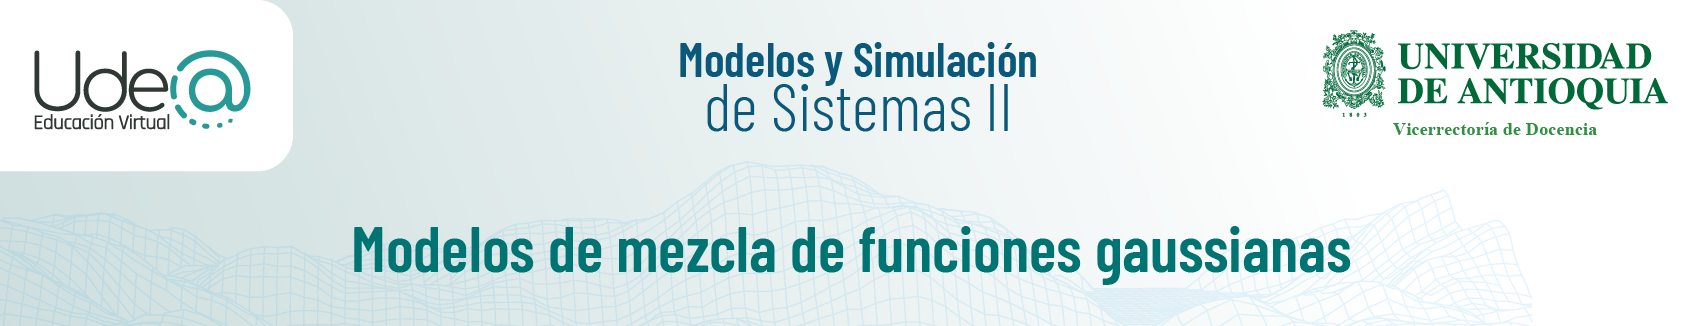

Hasta el momento, hemos visto que existen dos aproximaciones posibles al problema de clasificación:
<li>Encontrar una función que represente la frontera de separación entre dos clases.</li>
<li>Separar las muestras por clases y estimar una función de densidad de probabilidad (fdp) por cada una de ellas.</li>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import *

Supongamos un problema de clasificación donde las muestras se distribuyen de la siguiente manera:

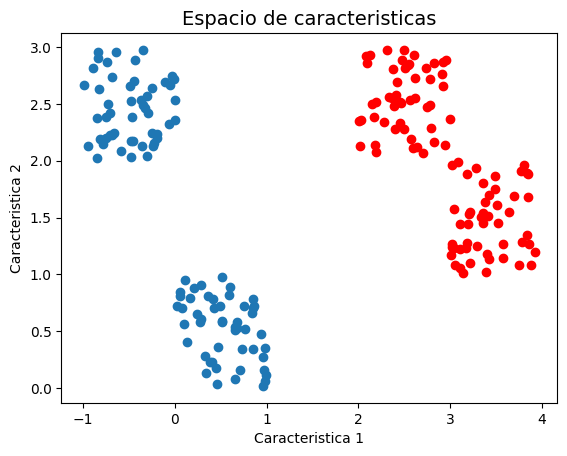

In [ ]:
x1 = np.random.rand(2,50)
x2 = np.random.rand(2,50) + 2
x3 = np.random.rand(2,50) + np.tile([[-1],[2]], (1, 50)) #np.tile Es equivalente a repmat en matlab
x4 = np.random.rand(2,50) + np.tile([[3],[1]], (1, 50))
XC1 = np.concatenate((x1,x3),axis=1)
XC2 = np.concatenate((x2,x4),axis=1)
plt.title('Espacio de caracteristicas', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(XC1[0,:], XC1[1,:])
plt.scatter(XC2[0,:], XC2[1,:],color='red')

Si nuestro deseo es usar un clasificador basado en la fdp de cada clase y por simplicidad decidimos usar un clasificador por función discriminante gaussiana, es decir, ajustar una función de densidad gaussiana para cada una de las clases, entonces el resultado obtenido sería el siguiente:

In [ ]:
from matplotlib.patches import Ellipse

def plot_ellipse(ax, mu ,sigma):

    vals, vecs = np.linalg.eigh(sigma)
    
    x , y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y,x))
    
    w,h = 4* np.sqrt(vals)
    
    ax.tick_params(axis='both',which='major',labelsize=20)
    ellipse = Ellipse(mu,w,h,theta,color='k')
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

<ipython-input-3-5888f74434f3>:13: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mu,w,h,theta,color='k')


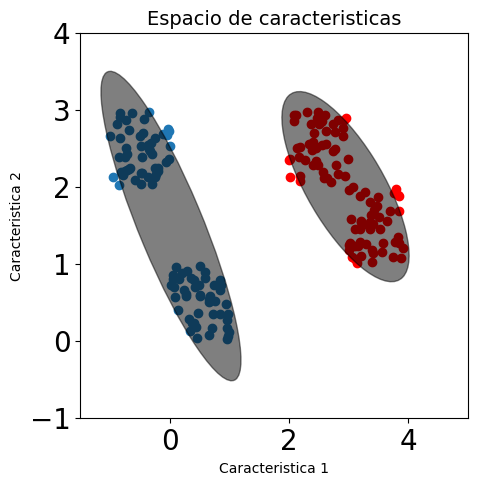

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Espacio de caracteristicas', fontsize=14)
ax.set_xlabel('Caracteristica 1')
ax.set_ylabel('Caracteristica 2')
ax.scatter(XC1[0,:], XC1[1,:])
ax.scatter(XC2[0,:], XC2[1,:],color='red')
ax.set_ylim(-1, 4)
ax.set_xlim(-1.5, 5)
plot_ellipse(ax, np.mean(XC1, axis=1) ,np.cov(XC1))
plot_ellipse(ax, np.mean(XC2, axis=1) ,np.cov(XC2))

En la figura anterior, cada una de las elipses representa la fdp obtenida para cada una de las clases. El centro de la elipse corresponde a su media, y la línea corresponde a dos veces la desviación estándar en cada sentido. Como podemos observar en la figura anterior los modelos se ajustan muy mal, debido a que las muestras de cada clase no están agrupadas en un solo conglomerado (clúster). En realidad, cada clase está, a su vez, dividida en varios grupos, y lo que necesitamos es un modelo que pueda representar correctamente esos diferentes grupos.

<ipython-input-5-5888f74434f3>:13: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mu,w,h,theta,color='k')


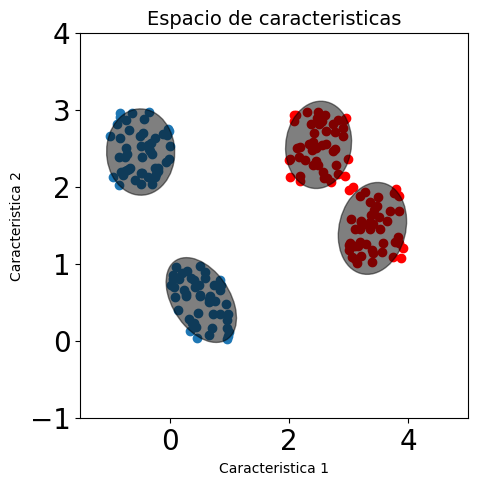

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Espacio de caracteristicas', fontsize=14)
ax.set_xlabel('Caracteristica 1')
ax.set_ylabel('Caracteristica 2')
ax.scatter(XC1[0,:], XC1[1,:])
ax.scatter(XC2[0,:], XC2[1,:],color='red')
ax.set_ylim(-1, 4)
ax.set_xlim(-1.5, 5)
plot_ellipse(ax, np.mean(x1, axis=1) ,np.cov(x1))
plot_ellipse(ax, np.mean(x2, axis=1) ,np.cov(x2))
plot_ellipse(ax, np.mean(x3, axis=1) ,np.cov(x3))
plot_ellipse(ax, np.mean(x4, axis=1) ,np.cov(x4))

Cada conglomerado estaría, entonces, representado por un vector de medias ${\bf{\mu}}_{ij}$ (clase $i$, conglomerado $j$) y una matriz de covarianza $\Sigma _{ij}$. Sin embargo, en este punto surgen varias preguntas que debemos responder:

<li> ¿Qué forma tendría la función de densidad de probabilidad de toda una clase? </li>
<li> ¿En cuántos conglomerados podrían estar agrupadas las muestras? </li>
<li> ¿Cómo se determina cuáles muestras se deben usar para estimar la media y la covarianza del primer conglomerado, y cuáles para el segundo? </li>
<li> ¿Cómo se determina el número de conglomerados si no se pueden visualizar las muestras porque el número de características es mayor a 3? </li>

Este tipo de modelos se conocen como <b> modelos de mezclas de funciones gaussianas</b> (en inglés <b> Gaussian Mixture Models - GMM</b>), y su forma general está dada por la siguiente función:

$$p({\bf{x}}|\Theta_i) = \sum_{j=1}^{M} \omega_{ij} \mathcal{N}({\bf{x}}|\mu_{ij},\Sigma_{ij})$$

Donde $M$ es el número de conglomerados en los cuales se van a dividir las muestras y $\omega_{ij}$ son pesos que se le asignan a cada conglomerado, es decir, dan una idea de qué tan representativo es el conglomerado dentro de la distribución completa de una clase. 

Deben cumplir la restricción: $\sum_{j=1}^{M} \omega_{ij} = 1$, esto es, que la suma de los pesos del modelo GMM para una clase debe ser igual a 1.

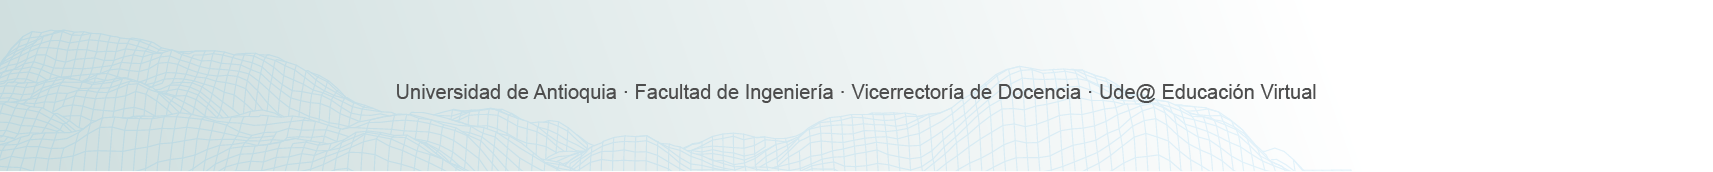